# Лабораторная работа №3

Задания:
1. Провести классификацию найденного датасета, методами линеной и логистической регрессий. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

<table>
<tr><th>Название столбца</th><th>Описание</th></tr>
<tr><td>ID</td><td>ID каждого клиента</td></tr>
<tr><td>LIMIT_BAL</td><td>Сумма выданного кредита в долларах NT (включает индивидуальный и семейный/дополнительный кредит)</td></tr>
<tr><td>SEX</td><td>Пол (1=мужской, 2=женский)</td></tr>
<tr><td>EDUCATION</td><td>(1=аспирантура, 2=университет, 3=средняя школа, 4=другое, 5=неизвестно, 6=неизвестно)</td></tr>
<tr><td>MARRIAGE</td><td>Семейное положение (1=замужем, 2=не замужем, 3=другое)</td></tr>
<tr><td>AGE</td><td>Возраст в годах</td></tr>
<tr><td>PAY_0</td><td>Статус погашения в сентябре 2005 года (-2=нет потребления, -1=оплачиваю должным образом, 0=использование возобновляемого кредита, 1=задержка платежа на один месяц, 2=задержка платежа на два месяца, ... )</td></tr>
<tr><td>PAY_2</td><td>Статус погашения в августе 2005 года (шкала такая же, как и выше)</td></tr>
<tr><td>PAY_3</td><td>Статус погашения в июле 2005 года (шкала та же, что и выше)</td></tr>
<tr><td>PAY_4</td><td>Статус погашения в июне 2005 года (шкала такая же, как выше)</td></tr>
<tr><td>PAY_5</td><td>Статус погашения в мае, 2005 (шкала такая же, как выше)</td></tr>
<tr><td>PAY_6</td><td>Статус погашения в апреле 2005 года (шкала такая же, как выше)</td></tr>
<tr><td>BILL_AMT1</td><td>Сумма выписки счета в сентябре, 2005 (NT доллар)</td></tr>
<tr><td>BILL_AMT2</td><td>Сумма выписки по счету за август, 2005 (NT доллар)</td></tr>
<tr><td>BILL_AMT3</td><td>Сумма выписки счета за июль, 2005 (NT доллар)</td></tr>
<tr><td>BILL_AMT4</td><td>Сумма выписки счета за июнь, 2005 (NT доллар)</td></tr>
<tr><td>BILL_AMT5</td><td>Сумма выписки счета за май, 2005 (NT доллар)</td></tr>
<tr><td>BILL_AMT6</td><td>Сумма выписки счета за апрель, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT1 </td><td>Сумма предыдущего платежа в сентябре, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT2 </td><td>Сумма предыдущего платежа в августе, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT3 </td><td>Сумма предыдущего платежа в июле, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT4</td><td>Сумма предыдущего платежа в июне, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT5</td><td>Сумма предыдущего платежа в мае, 2005 (NT доллар)</td></tr>
<tr><td>PAY_AMT6</td><td>Сумма предыдущего платежа в апреле, 2005 (NT доллар)</td></tr>
<tr><td>default payment next montr </td><td>Платеж по умолчанию (1=да, 0=нет)</td></tr>
</table>

In [17]:
import pandas
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
data = pandas.read_csv("data.csv", sep=',', index_col='ID');

## Обработка данных
- Пол, семейное положение и возраст - категорийные признаки.
- Значения EDUCATION 0,4,5,6 имеют одинаковый смысл.
- Значения MARRIAGE 0,3 имеют одинаковый смысл.

In [8]:
data[['SEX','MARRIAGE','EDUCATION']] = data[['SEX','MARRIAGE','EDUCATION']].astype('object')
data.loc[data["MARRIAGE"]==3, "MARRIAGE"] = 0
data.loc[data["EDUCATION"] > 3, "EDUCATION"] = 0

## Разметка данных

- "Обучающий набор" - 70% = 21000 записей
- Тестовый набор - 30% = 9000 записей

In [13]:
data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
X = data.drop("default payment next month", axis=1, inplace=False)
Y = data["default payment next month"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, stratify=Y,)
scaler = StandardScaler()
train_X_std = train_X.copy()
test_X_std = test_X.copy()

train_X_std['LIMIT_BAL'] = scaler.fit_transform(train_X['LIMIT_BAL'].values.reshape(-1, 1))
test_X_std['LIMIT_BAL'] = scaler.transform(test_X['LIMIT_BAL'].values.reshape(-1, 1))
train_X_std['AGE'] = scaler.fit_transform(train_X['AGE'].values.reshape(-1, 1))
test_X_std['AGE'] = scaler.transform(test_X['AGE'].values.reshape(-1, 1))
for i in range(1,7):
    train_X_std['PAY_' + str(i)] = scaler.fit_transform(train_X['PAY_' + str(i)].values.reshape(-1, 1))
    test_X_std['PAY_' + str(i)] = scaler.transform(test_X['PAY_' + str(i)].values.reshape(-1, 1))
    train_X_std['BILL_AMT' + str(i)] = scaler.fit_transform(train_X['BILL_AMT' + str(i)].values.reshape(-1, 1))
    test_X_std['BILL_AMT' + str(i)] = scaler.transform(test_X['BILL_AMT' + str(i)].values.reshape(-1, 1))
    train_X_std['PAY_AMT' + str(i)] = scaler.fit_transform(train_X['PAY_AMT' + str(i)].values.reshape(-1, 1))
    test_X_std['PAY_AMT' + str(i)] = scaler.transform(test_X['PAY_AMT' + str(i)].values.reshape(-1, 1))

## Поиск наилучших параметров

Полный поиск по заданным значениям параметров для получения оценки.
Параметры оптимизируются путем перекрестной проверки по сетке параметров.

In [10]:
params_lg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_lg = GridSearchCV(
    LogisticRegression(),    
    params_lg,
    cv=5,
    n_jobs=16
)

grid_search_lg.fit(train_X_std, train_Y)
print(grid_search_lg.best_params_)

{'C': 10.0}


## Классификация

In [15]:
logreg_classifier = LogisticRegression(C=10) 
logreg_classifier.fit(train_X_std, train_Y)
test_predict_Y = logreg_classifier.predict(test_X_std)  
test_predict_proba_Y = logreg_classifier.predict_proba(test_X_std)[:,1]      

In [43]:
linear_classifier = LinearRegression() 
linear_classifier.fit(train_X_std, train_Y)
test_predict_Y_ln = linear_classifier.predict(test_X_std)
threshold = 0.5
for i in range(0,len(test_predict_Y_ln)):
    if test_predict_Y_ln[i]>threshold:
        test_predict_Y_ln[i] = 1
    else:
        test_predict_Y_ln[i] = 0

## Статистика по результатам

Точность на тестовой выборке: 0.813


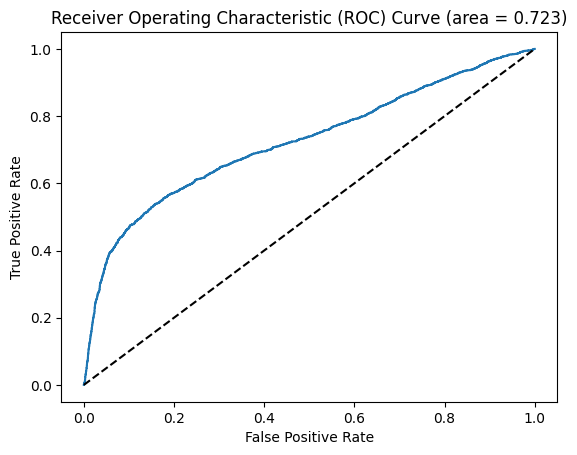

Classification Report of Test
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.73      0.25      0.37      1991

    accuracy                           0.81      9000
   macro avg       0.77      0.61      0.63      9000
weighted avg       0.80      0.81      0.77      9000

Точность на тестовой выборке: 0.7977777777777778


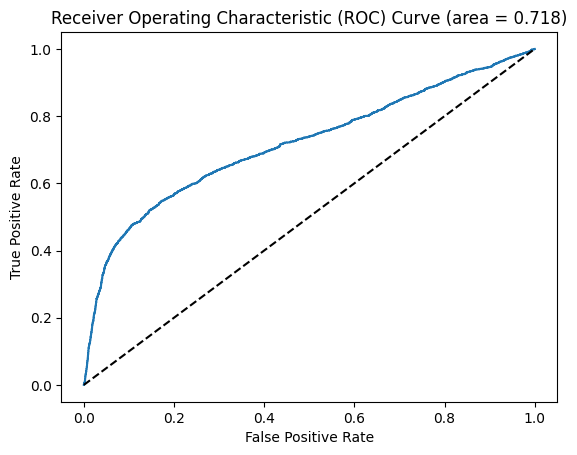

Classification Report of Test
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      7009
           1       0.73      0.14      0.23      1991

    accuracy                           0.80      9000
   macro avg       0.76      0.56      0.56      9000
weighted avg       0.78      0.80      0.74      9000



In [51]:
print('Точность на тестовой выборке:',accuracy_score(test_Y,test_predict_Y))
# Вычисление ROC-кривой и её параметров
fpr, tpr, thresholds = roc_curve(test_Y, test_predict_proba_Y)

# Построение ROC-кривой
plot.plot(fpr, tpr)
plot.plot([0, 1], [0, 1], 'k--')  # Случайное предсказание
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver Operating Characteristic (ROC) Curve (area = %0.3f)'% roc_auc_score(test_Y, test_predict_proba_Y))
plot.show()

print('Classification Report of Test\n',  classification_report(test_Y, test_predict_Y))

print('Точность на тестовой выборке:',accuracy_score(test_Y,test_predict_Y_ln))

# Вычисление ROC-кривой и её параметров
fpr, tpr, thresholds = roc_curve(test_Y, linear_classifier.predict(test_X_std))

# Построение ROC-кривой
plot.plot(fpr, tpr)
plot.plot([0, 1], [0, 1], 'k--')  # Случайное предсказание
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('Receiver Operating Characteristic (ROC) Curve (area = %0.3f)'% roc_auc_score(test_Y, linear_classifier.predict(test_X_std)))
plot.show()

print('Classification Report of Test\n',  classification_report(test_Y, test_predict_Y_ln))